# Car Price Prediction Using Linear Regression and Lasso Regression

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics # for finding error,accuracy

### Reading dataset and adding headers

In [2]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv(filename, names = headers)

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Data cleaning

In [4]:
df.replace("?", np.nan, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
missing_data = df.isnull() # return True if value is missing
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
for column in missing_data.columns:
    print(column)
    print(missing_data[column].value_counts())
    print("")


symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [7]:
# we see that there are missing datas in normalized-losses, num-of-doors, bore, stroke, horsepower, peak-rpm and price
# Now we replace missing value

In [8]:
avg_normalized_loss = df["normalized-losses"].astype(float).mean()
avg_normalized_loss

122.0

In [9]:
df["normalized-losses"].replace(np.nan, avg_normalized_loss, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [10]:
df["num-of-doors"].replace(np.nan, df["num-of-doors"].value_counts().idxmax(), inplace = True)
df.head()
# we replace nan value with maximum number of frequency

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [11]:
avg_bore = df["bore"].astype(float).mean()
avg_bore

3.3297512437810943

In [12]:
df["bore"].replace(np.nan, avg_bore, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [13]:
avg_stroke = df["stroke"].astype(float).mean()
avg_stroke

3.255422885572139

In [14]:
df["stroke"].replace(np.nan, avg_stroke, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [15]:
avg_horsepower = df["horsepower"].astype(float).mean()
avg_horsepower

104.25615763546799

In [16]:
df["horsepower"].replace(np.nan, avg_horsepower, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [17]:
avg_peak_rpm = df["peak-rpm"].astype(float).mean()
avg_peak_rpm

5125.369458128079

In [18]:
df["peak-rpm"].replace(np.nan, avg_peak_rpm, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [19]:
# price is the most important part if we want to predict price of cars. So, we delete all the rows that do not contain price
df.dropna(subset=["price"], inplace = True)
df.reset_index(drop = True, inplace = True) #we have to reset as we dropped rows
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [20]:
missing_data = df.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
for column in missing_data.columns:
    print(column)
    print(missing_data[column].value_counts())
    print("")
#we can see that there is no missing value now

symboling
False    201
Name: symboling, dtype: int64

normalized-losses
False    201
Name: normalized-losses, dtype: int64

make
False    201
Name: make, dtype: int64

fuel-type
False    201
Name: fuel-type, dtype: int64

aspiration
False    201
Name: aspiration, dtype: int64

num-of-doors
False    201
Name: num-of-doors, dtype: int64

body-style
False    201
Name: body-style, dtype: int64

drive-wheels
False    201
Name: drive-wheels, dtype: int64

engine-location
False    201
Name: engine-location, dtype: int64

wheel-base
False    201
Name: wheel-base, dtype: int64

length
False    201
Name: length, dtype: int64

width
False    201
Name: width, dtype: int64

height
False    201
Name: height, dtype: int64

curb-weight
False    201
Name: curb-weight, dtype: int64

engine-type
False    201
Name: engine-type, dtype: int64

num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64

engine-size
False    201
Name: engine-size, dtype: int64

fuel-system
False    201
Name: fuel-syst

In [22]:
df.dtypes
#all data format are not correct

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [23]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")
df["horsepower"]=df["horsepower"].astype("int")

In [24]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Data Standardization

In [25]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [26]:
# we convert given units into standard units

df["city-mpg"] = 235/df["city-mpg"]
df.rename(columns = {'city-mpg': 'city-L/100km'}, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,22,17450.0


In [27]:
df["highway-mpg"] = 235/df["highway-mpg"]
df.rename(columns = {'highway-mpg': 'highway-L/100km'}, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0


### Data Normalization

In [28]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max() 

# dividing usual value with max value for normalization

df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


### Binning

Text(0.5, 1.0, 'horsepower bins')

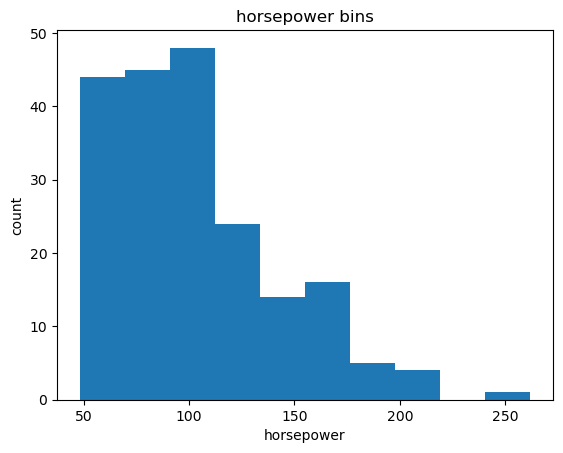

In [29]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [30]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [31]:
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head()

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low


Text(0.5, 1.0, 'horsepower bins')

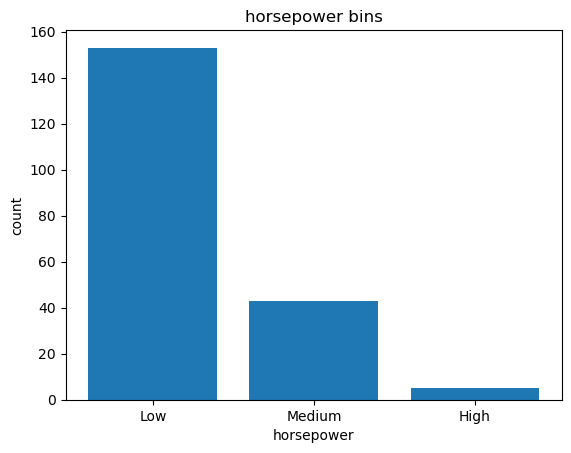

In [32]:
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

### Indicator variable

In [33]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [34]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [35]:
# merge dataframe with dummy variable
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column from dataframe as we are replacing it with new column
df.drop("fuel-type", axis = 1, inplace=True)

In [36]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0,Low,0,1


### Analyzing individual feature pattern to find predictor for price

In [37]:
df.corr()

C:\Users\shant\AppData\Local\Temp\ipykernel_14604\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,fuel-type-diesel,fuel-type-gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,0.066171,-0.029807,-0.082391,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,0.238567,0.181189,0.133999,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,0.476153,0.577576,0.584642,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,0.657373,0.707108,0.690628,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,0.673363,0.736728,0.751265,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,0.003811,0.084301,0.135486,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,0.785353,0.836921,0.834415,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,0.745059,0.783465,0.872335,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,0.554610,0.559112,0.543155,0.054458,-0.054458
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,0.036133,0.047089,0.082269,0.241064,-0.241064


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

#### Correlation between engine-size and price

(0.0, 53650.477730832004)

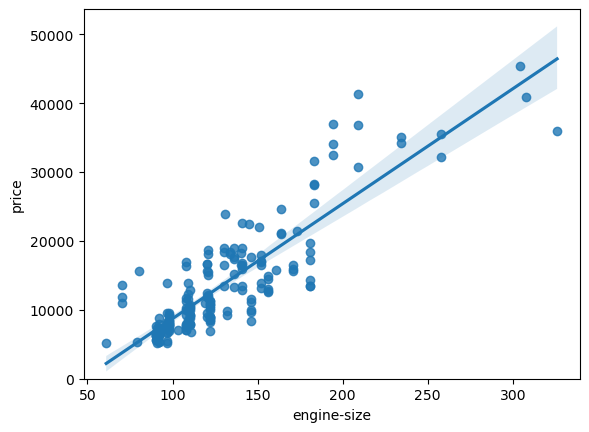

In [39]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [40]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


p  <  0.001 indicates that the correlation is statistically significant and linear relation is very strong as indicated by pearson coefficient

#### Correlation between highway-L/100km and price

<Axes: xlabel='highway-L/100km', ylabel='price'>

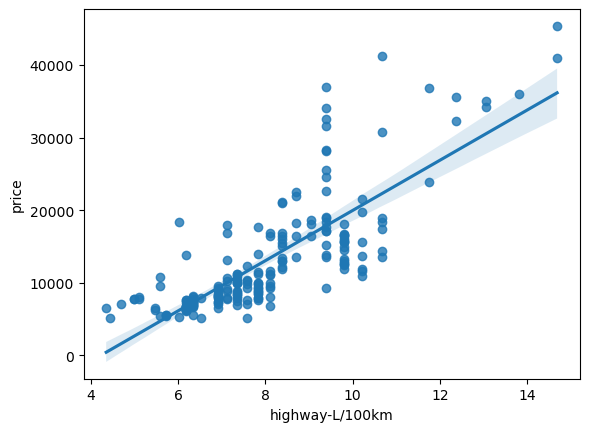

In [41]:
sns.regplot(x="highway-L/100km", y="price", data=df)

In [42]:
pearson_coef, p_value = stats.pearsonr(df['highway-L/100km'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.801117626398197  with a P-value of P = 3.0467845810420624e-46


p < 0.001 indicates that the correlation is statistically significant and linear relation is very strong as indicated by pearson coefficient

#### Correlation between peak-rmp and price

<Axes: xlabel='peak-rpm', ylabel='price'>

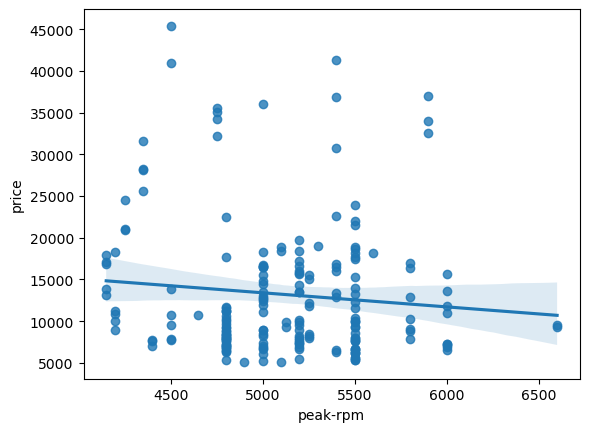

In [43]:
sns.regplot(x="peak-rpm", y="price", data=df)

Regression line is almost horizontal and data points are scattered which indicates it is not a good prediction variable.

#### Correlation between stroke and price

<Axes: xlabel='stroke', ylabel='price'>

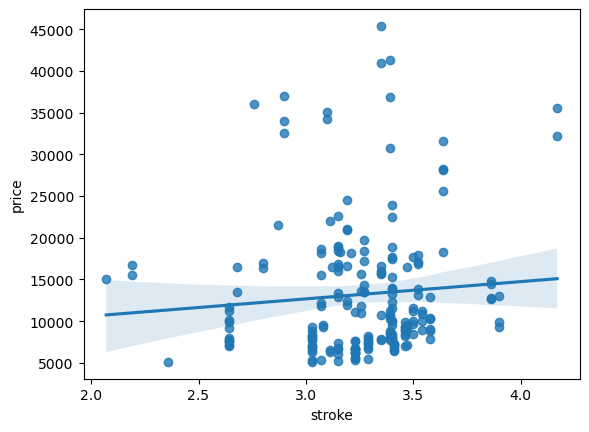

In [44]:
sns.regplot( x = "stroke",y ="price", data = df)

Stroke is not a good predictor variable.

#### Correlation between body-style and price

<Axes: xlabel='body-style', ylabel='price'>

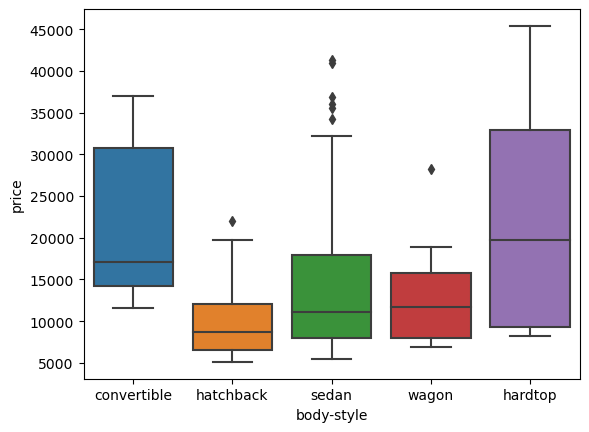

In [45]:
sns.boxplot(x="body-style", y="price", data=df)

Not a good predictor due to significant overlap.

#### Correlation between engine-location and price

<Axes: xlabel='engine-location', ylabel='price'>

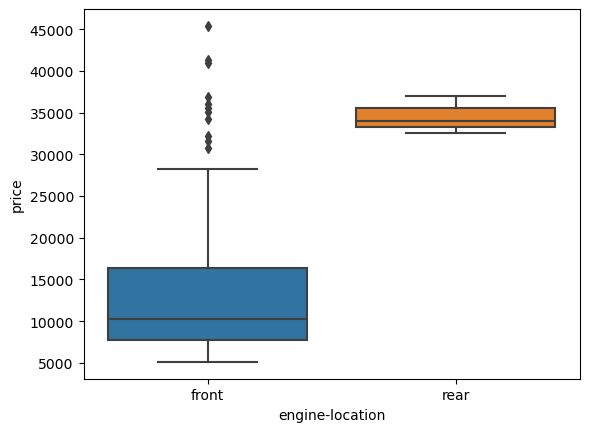

In [46]:
sns.boxplot(x="engine-location", y="price", data=df)

Potential good predictor

In [47]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head()

,value_counts
engine-location,
front,198
rear,3


There are only 3 engine location with rear, so it would not be a good predictor.

#### Correlation between drive-wheels and price

<Axes: xlabel='drive-wheels', ylabel='price'>

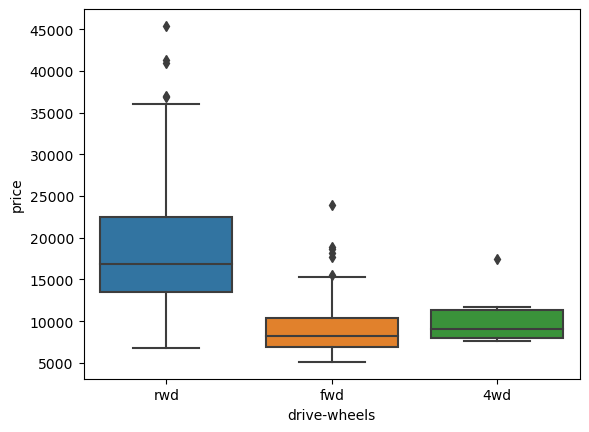

In [48]:
sns.boxplot(x="drive-wheels", y="price", data=df)

Potential good predictor

#### Correlation between wheel-base and price

In [49]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5846418222655083  with a P-value of P = 8.076488270732873e-20


p < 0.001 indicates that the correlation is statistically significant and linear relation is not so strong as indicated by pearson coefficient

#### Correlation between horse-power and price

In [50]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8096068016571052  with a P-value of P =  6.273536270650862e-48


p < 0.001 indicates that the correlation is statistically significant and linear relation is very strong as indicated by pearson coefficient

#### Correlation between length and price

In [51]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.6906283804483644  with a P-value of P =  8.016477466158188e-30


p < 0.001 indicates that the correlation is statistically significant and linear relation is moderately strong as indicated by pearson coefficient

#### Correlation between width and price

In [52]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522674  with a P-value of P = 9.200335510481516e-38


p < 0.001 indicates that the correlation is statistically significant and linear relation is quite strong as indicated by pearson coefficient

#### Correlation between curb-weight and price

In [53]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702849  with a P-value of P =  2.1895772388933803e-53


p < 0.001 indicates that the correlation is statistically significant and linear relation is very strong as indicated by pearson coefficient

#### Correlation between bore and price

In [54]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626606  with a P-value of P =   8.049189483935032e-17


p < 0.001 indicates that the correlation is statistically significant and linear relation is moderately strong as indicated by pearson coefficient

#### Correlation between city-L/100km and price

In [55]:
pearson_coef, p_value = stats.pearsonr(df['city-L/100km'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.7898975136626946  with a P-value of P =  3.9031064009392475e-44


p < 0.001 indicates that the correlation is statistically significant and linear relation is moderately strong as indicated by pearson coefficient.

Potential good predictors to predict price are Length, Width, Curb-weight, Engine-size, Horsepower, City-L/100km, Highway-L/100km, Wheel-base, Bore and Drive-wheels.

In [56]:
#df.to_csv('potential predictors_df.csv')

In [57]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0,Low,0,1


In [58]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-L/100km', 'highway-L/100km', 'price',
       'horsepower-binned', 'fuel-type-diesel', 'fuel-type-gas'],
      dtype='object')

In [59]:
# Splitting dependent and independent columns
a = ['length','width','curb-weight','engine-size','horsepower','city-L/100km','highway-L/100km','wheel-base','bore','drive-wheels']
X = df[a]
Y = df['price'] # This is our target variable

In [60]:
X

,length,width,curb-weight,engine-size,horsepower,city-L/100km,highway-L/100km,wheel-base,bore,drive-wheels
0,0.811148,0.890278,2548,130,111,11.190476,8.703704,88.6,3.47,rwd
1,0.811148,0.890278,2548,130,111,11.190476,8.703704,88.6,3.47,rwd
2,0.822681,0.909722,2823,152,154,12.368421,9.038462,94.5,2.68,rwd
3,0.848630,0.919444,2337,109,102,9.791667,7.833333,99.8,3.19,fwd
4,0.848630,0.922222,2824,136,115,13.055556,10.681818,99.4,3.19,4wd
...,...,...,...,...,...,...,...,...,...,...
196,0.907256,0.956944,2952,141,114,10.217391,8.392857,109.1,3.78,rwd
197,0.907256,0.955556,3049,141,160,12.368421,9.400000,109.1,3.78,rwd
198,0.907256,0.956944,3012,173,134,13.055556,10.217391,109.1,3.58,rwd
199,0.907256,0.956944,3217,145,106,9.038462,8.703704,109.1,3.01,rwd


In [61]:
print(X['drive-wheels'].value_counts())

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64


In [62]:
# Replace categorical text value into numerical value
X.replace({'drive-wheels':{'fwd':0,'rwd':1,'4wd':2}},inplace = True)

C:\Users\shant\AppData\Local\Temp\ipykernel_14604\3856603566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace({'drive-wheels':{'fwd':0,'rwd':1,'4wd':2}},inplace = True)


In [63]:
X.head()

,length,width,curb-weight,engine-size,horsepower,city-L/100km,highway-L/100km,wheel-base,bore,drive-wheels
0,0.811148,0.890278,2548,130,111,11.190476,8.703704,88.6,3.47,1
1,0.811148,0.890278,2548,130,111,11.190476,8.703704,88.6,3.47,1
2,0.822681,0.909722,2823,152,154,12.368421,9.038462,94.5,2.68,1
3,0.848630,0.919444,2337,109,102,9.791667,7.833333,99.8,3.19,0
4,0.848630,0.922222,2824,136,115,13.055556,10.681818,99.4,3.19,2


In [64]:
Y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [65]:
# Splitting Training and Test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2) # 90% training data and 10% test data


#### Linear Regression Model

In [66]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [67]:
training_data_prediction = lin_reg_model.predict(X_train)

In [68]:
# R square error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R square error: ",error_score)

R square error:  0.8367000241808232


####  It is a good fit as prediction is 83% reliable.

#### Visualize actual and predicted values

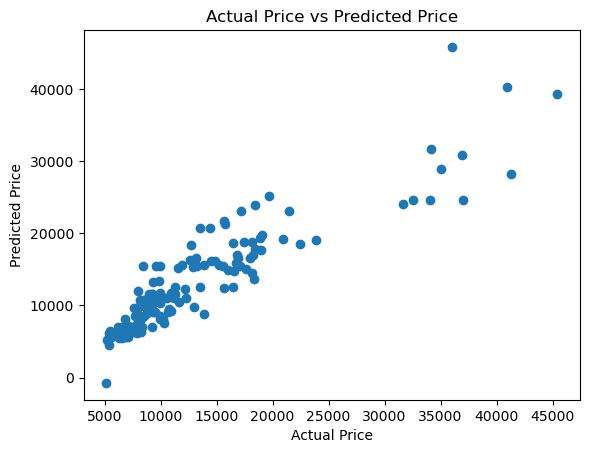

In [69]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [70]:
#Same process for test data
test_data_prediction = lin_reg_model.predict(X_test)

In [71]:
# R square error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R square error: ",error_score)

R square error:  0.7905089932606117


#### Predicted value is 79% accurate.

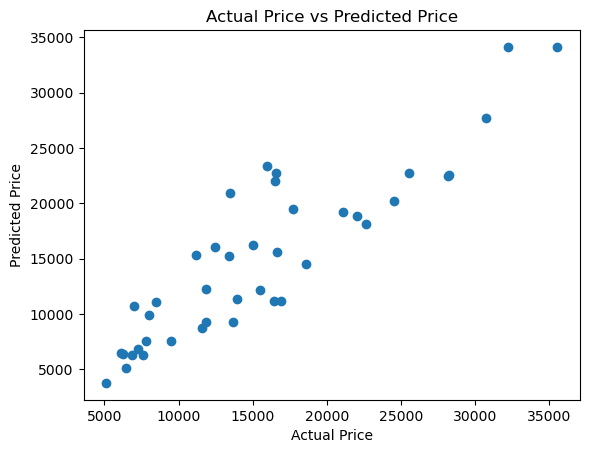

In [72]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

#### Lasso Regression Model

In [73]:
lass_reg_model = Lasso()

In [74]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [75]:
training_data_prediction = lass_reg_model.predict(X_train)

In [76]:
# R square error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R square error: ",error_score)

R square error:  0.8365716186412702


####  It is a good fit as prediction is 83% reliable.

### Visualize actual and predicted values

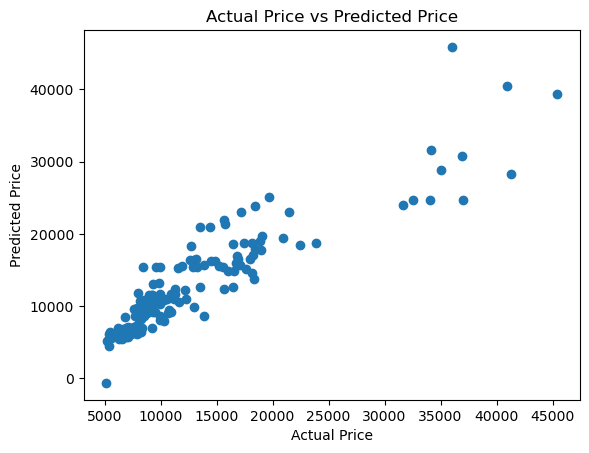

In [77]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [78]:
# Same process for test data
test_data_prediction = lass_reg_model.predict(X_test)

In [79]:
# R square error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R square error: ",error_score)

R square error:  0.7888817297123965


#### Predicted value is 78% accurate.

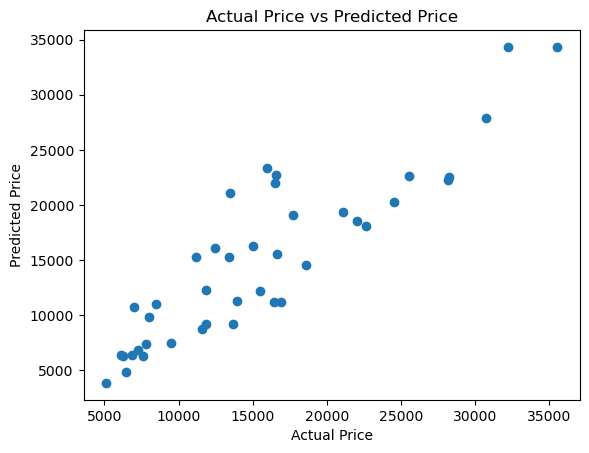

In [80]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

### Both Linear Regression Model and Lasso Regression Model works well in this dataset